In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings as warn

# Setting ignore as a parameter

In [2]:
warn.filterwarnings('ignore')

# Load data from .csv or .xlsx files

In [3]:
data = pd.read_csv('dataset.csv')
data

,Attractive Level,Sound,Music,Noise control,Speaking Style,Camera,Stable,Angel diversity,Images,Resolution,Color,Content,Introduction,Food description,Reviewer,Reviewer emotion,Recommendation,Clear information
0,3,4,4,3,4,4,4,1,5,4,5,4,1,1,3,2,0,1
1,2,3,3,1,3,3,2,1,3,3,3,3,1,1,3,3,1,1
2,4,4,4,2,3,4,4,1,4,5,4,4,1,1,4,3,1,1
3,2,2,2,1,3,3,4,1,2,4,1,3,1,0,2,2,0,1
4,2,3,3,2,3,3,4,0,3,4,2,3,1,0,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,4,4,3,3,4,4,3,1,4,4,4,4,1,1,4,3,1,1
131,3,3,3,3,3,3,4,1,3,4,3,3,1,1,3,2,0,1
132,4,4,4,2,4,4,4,1,4,4,4,4,1,1,4,3,1,1
133,2,3,3,3,3,3,3,1,4,4,4,2,1,1,4,2,0,1


# Data set (Features and labels)

In [4]:
features = data.loc[:, data.columns != "Attractive Level"].values
labels = data.loc[:, data.columns == "Attractive Level"].values

In [5]:
features

array([[4, 4, 3, ..., 2, 0, 1],
       [3, 3, 1, ..., 3, 1, 1],
       [4, 4, 2, ..., 3, 1, 1],
       ...,
       [4, 4, 2, ..., 3, 1, 1],
       [3, 3, 3, ..., 2, 0, 1],
       [5, 5, 4, ..., 3, 1, 1]])

In [6]:
labels

array([[3],
       [2],
       [4],
       [2],
       [2],
       [3],
       [4],
       [3],
       [4],
       [2],
       [4],
       [3],
       [4],
       [3],
       [4],
       [2],
       [5],
       [4],
       [4],
       [4],
       [3],
       [3],
       [5],
       [3],
       [3],
       [3],
       [5],
       [3],
       [3],
       [3],
       [4],
       [2],
       [2],
       [3],
       [4],
       [4],
       [2],
       [2],
       [2],
       [5],
       [3],
       [5],
       [3],
       [3],
       [3],
       [2],
       [2],
       [3],
       [4],
       [1],
       [4],
       [3],
       [2],
       [2],
       [3],
       [4],
       [2],
       [3],
       [4],
       [2],
       [5],
       [4],
       [5],
       [3],
       [4],
       [3],
       [2],
       [4],
       [4],
       [3],
       [2],
       [3],
       [3],
       [3],
       [4],
       [5],
       [3],
       [4],
       [3],
       [4],
       [3],
       [3],
       [4],
    

# Split dataset into train_set and test_set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state = 42)

In [8]:
X_train

array([[5, 4, 4, ..., 3, 0, 0],
       [5, 4, 5, ..., 3, 1, 1],
       [3, 3, 3, ..., 2, 0, 0],
       ...,
       [3, 3, 2, ..., 3, 1, 1],
       [2, 2, 2, ..., 3, 0, 0],
       [1, 1, 3, ..., 2, 1, 1]])

In [9]:
X_test

array([[3, 4, 3, 3, 4, 4, 1, 3, 4, 3, 3, 1, 0, 3, 3, 0, 0],
       [4, 4, 4, 3, 4, 5, 1, 4, 4, 3, 4, 1, 1, 4, 3, 1, 1],
       [2, 1, 2, 3, 3, 3, 0, 3, 4, 3, 1, 0, 0, 2, 1, 0, 0],
       [4, 3, 4, 5, 5, 5, 1, 4, 4, 4, 5, 1, 1, 4, 3, 1, 1],
       [3, 4, 3, 3, 3, 3, 1, 3, 4, 3, 4, 1, 1, 3, 2, 0, 1],
       [5, 5, 4, 5, 5, 5, 1, 5, 4, 5, 4, 1, 1, 5, 3, 1, 1],
       [4, 4, 4, 5, 4, 4, 1, 4, 4, 4, 4, 1, 1, 4, 3, 1, 1],
       [4, 3, 4, 4, 2, 2, 0, 2, 4, 3, 3, 1, 0, 2, 2, 0, 1],
       [3, 4, 3, 3, 3, 3, 1, 3, 5, 3, 3, 1, 0, 3, 3, 0, 1],
       [3, 3, 3, 4, 4, 3, 1, 3, 4, 3, 4, 1, 1, 4, 3, 0, 1],
       [2, 1, 2, 3, 3, 3, 1, 4, 4, 3, 3, 1, 0, 3, 3, 0, 1],
       [3, 3, 2, 3, 3, 2, 1, 3, 3, 3, 4, 1, 1, 4, 3, 0, 1],
       [3, 3, 3, 3, 3, 4, 1, 3, 3, 3, 4, 1, 1, 3, 3, 0, 1],
       [4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 5, 1, 1, 4, 3, 0, 1],
       [5, 4, 3, 5, 5, 5, 1, 5, 3, 4, 5, 1, 1, 5, 3, 1, 1],
       [3, 2, 2, 4, 2, 1, 1, 3, 4, 3, 3, 1, 0, 4, 3, 0, 1],
       [2, 3, 2, 4, 4, 3, 1, 3, 4, 3, 3,

In [10]:
y_train

array([[3],
       [5],
       [3],
       [2],
       [2],
       [2],
       [3],
       [4],
       [2],
       [3],
       [4],
       [4],
       [4],
       [2],
       [4],
       [5],
       [5],
       [3],
       [3],
       [3],
       [3],
       [4],
       [3],
       [2],
       [2],
       [3],
       [4],
       [3],
       [4],
       [3],
       [5],
       [4],
       [3],
       [2],
       [3],
       [3],
       [3],
       [3],
       [1],
       [4],
       [4],
       [4],
       [3],
       [3],
       [2],
       [4],
       [5],
       [4],
       [4],
       [3],
       [4],
       [2],
       [4],
       [2],
       [3],
       [3],
       [4],
       [3],
       [4],
       [4],
       [3],
       [4],
       [3],
       [2],
       [2],
       [4],
       [4],
       [4],
       [3],
       [4],
       [5],
       [4],
       [1],
       [4],
       [4],
       [2],
       [3],
       [5],
       [2],
       [1],
       [2],
       [3],
       [4],
    

In [11]:
y_test

array([[3],
       [4],
       [1],
       [4],
       [3],
       [5],
       [4],
       [2],
       [3],
       [4],
       [3],
       [3],
       [3],
       [4],
       [5],
       [2],
       [3],
       [2],
       [4],
       [3],
       [5],
       [5],
       [5],
       [4],
       [4],
       [2],
       [2]])

# Train model

In [12]:
svc = SVC(gamma=0.1, C= 1, class_weight='balanced')
svc.fit(X_train, y_train.ravel())
y_pred = svc.predict(X_test)

In [13]:
y_pred

array([3, 4, 2, 4, 3, 5, 4, 2, 3, 4, 2, 3, 3, 4, 5, 2, 3, 2, 4, 3, 5, 5,
       5, 4, 4, 2, 2])

# Error and Accuracy

In [14]:
print("Baseline =", 43/135)

Baseline = 0.31851851851851853


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.83      0.96      0.89        25
           3       0.93      0.77      0.84        35
           4       0.91      0.86      0.88        35
           5       0.71      1.00      0.83        10

    accuracy                           0.87       108
   macro avg       0.88      0.92      0.89       108
weighted avg       0.88      0.87      0.87       108



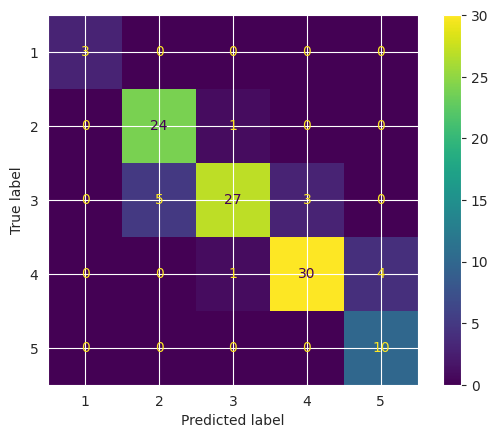

In [15]:
# Train data set
y_pred_train = svc.predict(X_train)
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(svc, X_train, y_train)
plt.show()

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.71      1.00      0.83         5
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5

    accuracy                           0.93        27
   macro avg       0.74      0.78      0.75        27
weighted avg       0.91      0.93      0.91        27



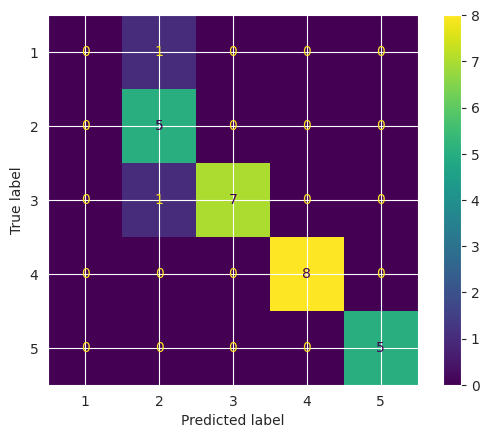

In [16]:
# Test Data set
print(classification_report(y_test, y_pred))
plot_confusion_matrix(svc, X_test, y_test)
plt.show()